# NICF – Pattern Recognition with Deep Learning

In [2]:
import tensorflow as tf
from tensorflow import keras

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())

tf.test.gpu_device_name()

Version:  2.2.0
Eager mode:  True


'/device:GPU:0'

# Topic 1 Image Recognition with CNN

## Teachable Machine

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
ls '/content/drive/My Drive/dataset/'

In [ ]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = tensorflow.keras.models.load_model('/content/drive/My Drive/dataset/keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open('/content/drive/My Drive/dataset/test_photo.jpg')

#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)

# display the resized image
image.show()

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)

## Binary Classification

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

### Import the data

In [103]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
PATH

68608000/68606236 [==============================] - 1s 0us/step


'/root/.keras/datasets/cats_and_dogs_filtered'

In [104]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [105]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [106]:
print(train_cats_dir)
print(train_dogs_dir)
print(validation_cats_dir)
print(validation_dogs_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [107]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [108]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

### Image Generator

In [109]:
train_image_generator = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255) 

In [145]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [111]:
sample_training_images, _ = next(train_data_gen)

### Visualize the raw images 

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
plotImages(sample_training_images[:5])

### Build the Model

In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

### Train the Model

In [147]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_original = model.fit(
    train_data_gen,
    steps_per_epoch=total_train//batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val//batch_size
)

Epoch 1/15
15/15 [==============================] - 8s 554ms/step - loss: 0.9219 - accuracy: 0.5080 - val_loss: 0.6926 - val_accuracy: 0.4967
Epoch 2/15
15/15 [==============================] - 8s 548ms/step - loss: 0.6922 - accuracy: 0.5135 - val_loss: 0.6920 - val_accuracy: 0.5145
Epoch 3/15
15/15 [==============================] - 8s 548ms/step - loss: 0.6913 - accuracy: 0.5246 - val_loss: 0.6883 - val_accuracy: 0.5134
Epoch 4/15
15/15 [==============================] - 8s 557ms/step - loss: 0.6873 - accuracy: 0.5438 - val_loss: 0.6895 - val_accuracy: 0.5089
Epoch 5/15
15/15 [==============================] - 8s 551ms/step - loss: 0.6720 - accuracy: 0.5688 - val_loss: 0.6488 - val_accuracy: 0.5815
Epoch 6/15
15/15 [==============================] - 8s 548ms/step - loss: 0.6520 - accuracy: 0.6271 - val_loss: 0.6341 - val_accuracy: 0.6451
Epoch 7/15
15/15 [==============================] - 8s 543ms/step - loss: 0.5980 - accuracy: 0.6741 - val_loss: 0.5801 - val_accuracy: 0.6897
Epoch 

### Evaluate the Model

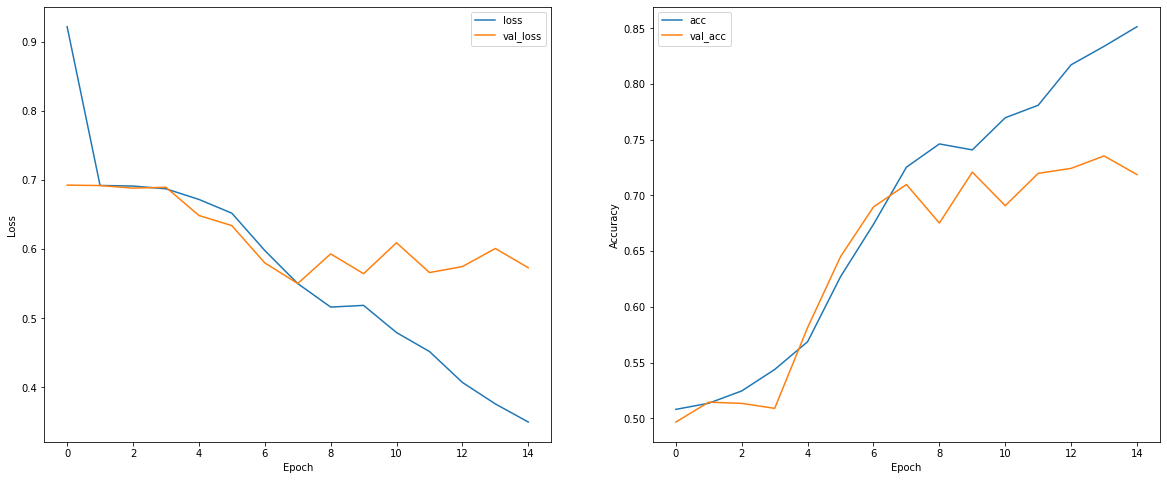

In [148]:
loss = history_original.history['loss']
val_loss = history_original.history['val_loss']
acc = history_original.history['accuracy']
val_acc = history_original.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [150]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [151]:
model.save('/content/drive/My Drive/dataset/cats_and_dogs_small.h5')

In [152]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/My Drive/dataset/cats_and_dogs_small.h5')
model.summary() 

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 18, 18, 128)     

### Test the Model

In [162]:
from keras.preprocessing import image
import numpy as np

img_path = '/content/drive/My Drive/dataset/test_cat.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

(1, 150, 150, 3)


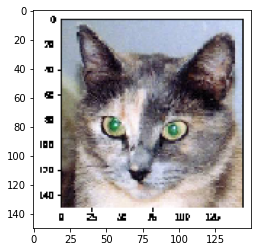

In [163]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [165]:
model.predict(img_tensor)

array([[0.27612323, 0.72387683]], dtype=float32)

In [166]:
img_path = '/content/drive/My Drive/dataset/test_dog.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

(1, 150, 150, 3)


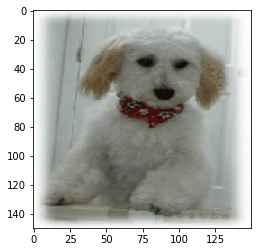

In [167]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [168]:
model.predict(img_tensor)

array([[0.67706007, 0.3229399 ]], dtype=float32)

## Feature Map Visualization

In [ ]:
from tensorflow.keras.models import Model

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]

# Creates a model that will return these outputs, given the model input:
activation_model = Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

In [ ]:
import matplotlib.pyplot as plt

i = 30 # Try i from 0 to 51
plt.matshow(first_layer_activation[0, :, :, i], cmap='viridis')
plt.show()

In [ ]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

## Multiple Categories Classification

### Access the data to Google Drive

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [11]:
ls '/content/drive/My Drive/dataset/transport'

train/  validation/


In [12]:
PATH = "/content/drive/My Drive/dataset/transport"

In [13]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [14]:
train_car_dir = os.path.join(train_dir, 'car')  # directory with our training car pictures
train_bike_dir = os.path.join(train_dir, 'bike')  # directory with our training bike pictures
train_plane_dir = os.path.join(train_dir, 'plane')  # directory with our training bike pictures
validation_car_dir = os.path.join(validation_dir, 'car')  # directory with our validation car pictures
validation_bike_dir = os.path.join(validation_dir, 'bike')  # directory with our validation bike pictures
validation_plane_dir = os.path.join(validation_dir, 'plane')  # directory with our validation bus pictures

In [15]:
print(train_car_dir)
print(train_bike_dir)
print(train_plane_dir)
print(validation_car_dir)
print(validation_bike_dir)
print(validation_plane_dir)

/content/drive/My Drive/dataset/transport/train/car
/content/drive/My Drive/dataset/transport/train/bike
/content/drive/My Drive/dataset/transport/train/plane
/content/drive/My Drive/dataset/transport/validation/car
/content/drive/My Drive/dataset/transport/validation/bike
/content/drive/My Drive/dataset/transport/validation/plane


In [16]:
num_car_tr = len(os.listdir(train_car_dir))
num_bike_tr = len(os.listdir(train_bike_dir))
num_plane_tr = len(os.listdir(train_plane_dir))

num_car_val = len(os.listdir(validation_car_dir))
num_bike_val = len(os.listdir(validation_bike_dir))
num_plane_val = len(os.listdir(validation_plane_dir))

total_train = num_car_tr + num_bike_tr + num_plane_tr
total_val = num_car_val + num_bike_val + num_plane_val

print('total training car images:', num_car_tr)
print('total training bike images:', num_bike_tr)
print('total training bus images:', num_plane_tr)

print('total validation car images:', num_car_val)
print('total validation bike images:', num_bike_val)
print('total validation plane images:', num_plane_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training car images: 20
total training bike images: 20
total training bus images: 20
total validation car images: 10
total validation bike images: 10
total validation plane images: 10
--
Total training images: 60
Total validation images: 30


In [17]:
batch_size = 10
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

### Image Generator

In [18]:
train_image_generator = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255) 

In [74]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size, 
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 60 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [75]:
sample_training_images, _ = next(train_data_gen)

In [76]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

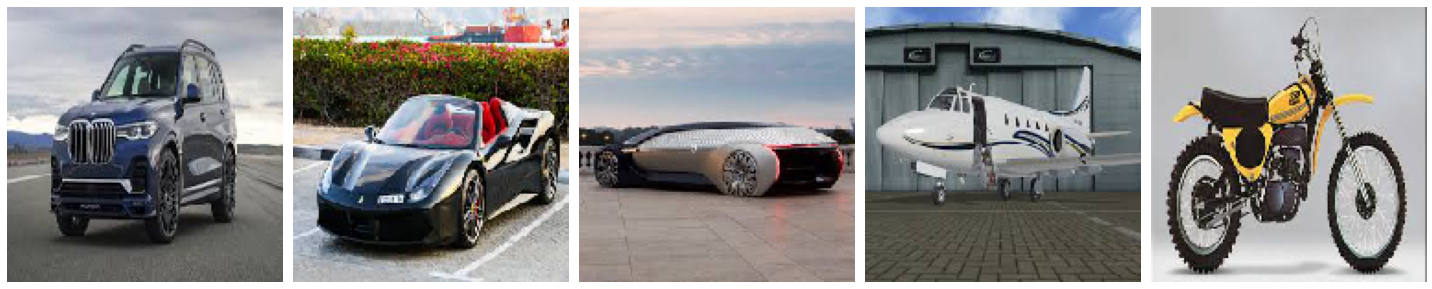

In [77]:
plotImages(sample_training_images[:5])

### Build the Model

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

### Train the Model

In [79]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train//batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val//batch_size
)

Epoch 1/15
6/6 [==============================] - 0s 57ms/step - loss: 1.2338 - accuracy: 0.2000 - val_loss: 1.0803 - val_accuracy: 0.3333
Epoch 2/15
6/6 [==============================] - 0s 43ms/step - loss: 1.0621 - accuracy: 0.3333 - val_loss: 0.9885 - val_accuracy: 0.3333
Epoch 3/15
6/6 [==============================] - 0s 44ms/step - loss: 0.9559 - accuracy: 0.4667 - val_loss: 0.9306 - val_accuracy: 0.7333
Epoch 4/15
6/6 [==============================] - 0s 44ms/step - loss: 0.8414 - accuracy: 0.6500 - val_loss: 0.5335 - val_accuracy: 0.9000
Epoch 5/15
6/6 [==============================] - 0s 43ms/step - loss: 0.6020 - accuracy: 0.8000 - val_loss: 0.9802 - val_accuracy: 0.7000
Epoch 6/15
6/6 [==============================] - 0s 45ms/step - loss: 0.7015 - accuracy: 0.7333 - val_loss: 1.2477 - val_accuracy: 0.6667
Epoch 7/15
6/6 [==============================] - 0s 42ms/step - loss: 0.8138 - accuracy: 0.6500 - val_loss: 0.5907 - val_accuracy: 0.7000
Epoch 8/15
6/6 [===========

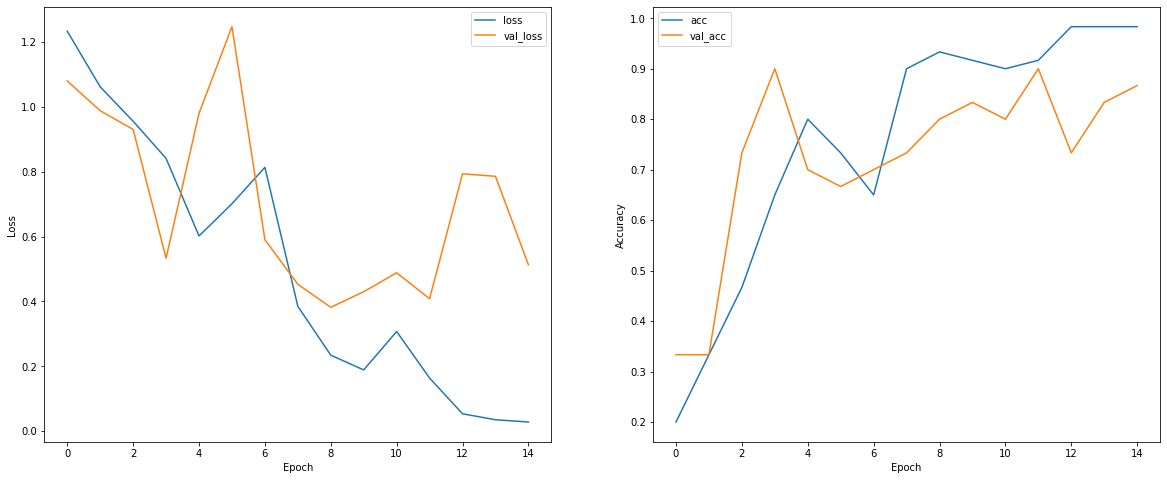

In [82]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [83]:
from keras.preprocessing import image
import numpy as np

img_path = '/content/drive/My Drive/dataset/test_car.jpeg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

(1, 150, 150, 3)


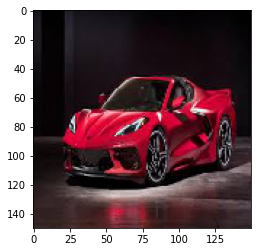

In [84]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [86]:
model.predict(img_tensor)

array([[7.1407680e-04, 9.9928564e-01, 3.9340816e-07]], dtype=float32)

In [87]:
img_path = '/content/drive/My Drive/dataset/test_bike.jpeg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

(1, 150, 150, 3)


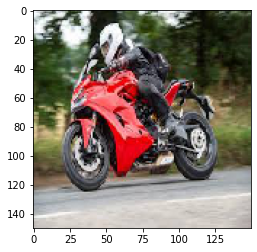

In [88]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [89]:
model.predict(img_tensor)

array([[9.6608424e-01, 3.3915751e-02, 2.5280146e-08]], dtype=float32)

In [90]:
img_path = '/content/drive/My Drive/dataset/test_plane.jpeg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

(1, 150, 150, 3)


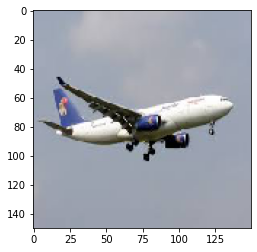

In [91]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [92]:
model.predict(img_tensor)

array([[5.1995223e-05, 7.9346253e-05, 9.9986863e-01]], dtype=float32)

# Topic 2 Methods to Solve Overfitting

### Weight Regularization

In [57]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
PATH

'/root/.keras/datasets/cats_and_dogs_filtered'

In [58]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [59]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [60]:
print(train_cats_dir)
print(train_dogs_dir)
print(validation_cats_dir)
print(validation_dogs_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [61]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [62]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [63]:
train_image_generator = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255) 

In [64]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import regularizers

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape = (IMG_HEIGHT, IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [70]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_l2 = model.fit(
    train_data_gen,
    steps_per_epoch=total_train//batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val//batch_size
)

Epoch 1/15
15/15 [==============================] - 10s 648ms/step - loss: 1.0388 - accuracy: 0.4952 - val_loss: 0.8772 - val_accuracy: 0.4900
Epoch 2/15
15/15 [==============================] - 10s 639ms/step - loss: 0.8545 - accuracy: 0.5246 - val_loss: 0.8329 - val_accuracy: 0.4967
Epoch 3/15
15/15 [==============================] - 10s 643ms/step - loss: 0.8160 - accuracy: 0.5630 - val_loss: 0.7996 - val_accuracy: 0.5156
Epoch 4/15
15/15 [==============================] - 10s 637ms/step - loss: 0.7833 - accuracy: 0.5929 - val_loss: 0.7444 - val_accuracy: 0.6451
Epoch 5/15
15/15 [==============================] - 10s 640ms/step - loss: 0.7530 - accuracy: 0.6362 - val_loss: 0.7305 - val_accuracy: 0.6652
Epoch 6/15
15/15 [==============================] - 10s 645ms/step - loss: 0.7269 - accuracy: 0.6512 - val_loss: 0.7635 - val_accuracy: 0.5737
Epoch 7/15
15/15 [==============================] - 10s 642ms/step - loss: 0.7088 - accuracy: 0.6709 - val_loss: 0.6756 - val_accuracy: 0.7087

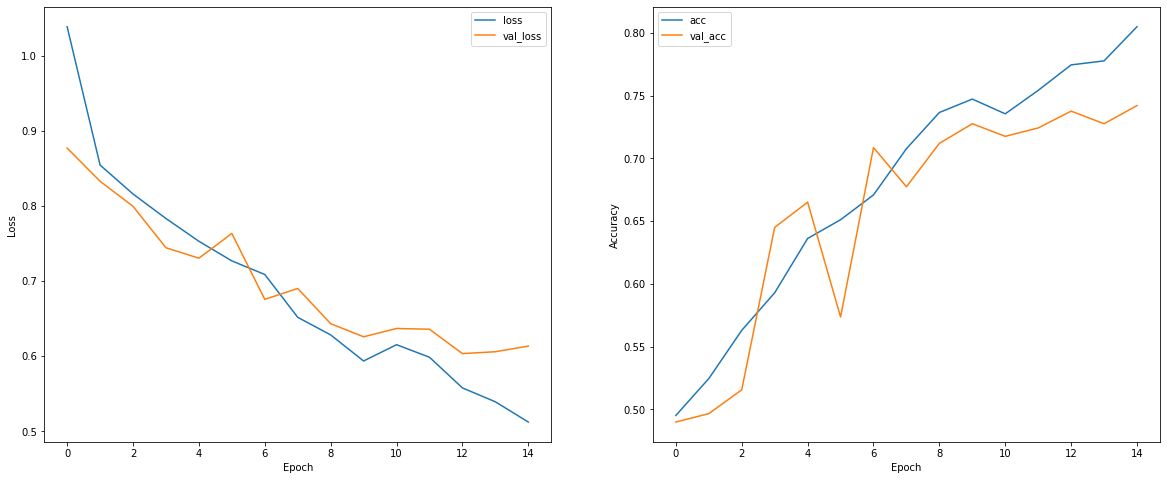

In [71]:
loss = history_l2.history['loss']
val_loss = history_l2.history['val_loss']
acc = history_l2.history['accuracy']
val_acc = history_l2.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import regularizers

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l1(0.001), input_shape = (IMG_HEIGHT, IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', kernel_regularizer=regularizers.l1(0.001), activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', kernel_regularizer=regularizers.l1(0.001), activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', kernel_regularizer=regularizers.l1(0.001), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [73]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_l1 = model.fit(
    train_data_gen,
    steps_per_epoch=total_train//batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val//batch_size
)

Epoch 1/15
15/15 [==============================] - 10s 646ms/step - loss: 6.2250 - accuracy: 0.5016 - val_loss: 4.8462 - val_accuracy: 0.5022
Epoch 2/15
15/15 [==============================] - 10s 634ms/step - loss: 3.8926 - accuracy: 0.5353 - val_loss: 2.9114 - val_accuracy: 0.6172
Epoch 3/15
15/15 [==============================] - 10s 637ms/step - loss: 2.2955 - accuracy: 0.5630 - val_loss: 1.7379 - val_accuracy: 0.5614
Epoch 4/15
15/15 [==============================] - 10s 641ms/step - loss: 1.4936 - accuracy: 0.5310 - val_loss: 1.2612 - val_accuracy: 0.4955
Epoch 5/15
15/15 [==============================] - 10s 638ms/step - loss: 1.1334 - accuracy: 0.5657 - val_loss: 1.0060 - val_accuracy: 0.6027
Epoch 6/15
15/15 [==============================] - 10s 638ms/step - loss: 0.9572 - accuracy: 0.5801 - val_loss: 0.8953 - val_accuracy: 0.6194
Epoch 7/15
15/15 [==============================] - 10s 637ms/step - loss: 0.8699 - accuracy: 0.5897 - val_loss: 0.8095 - val_accuracy: 0.6484

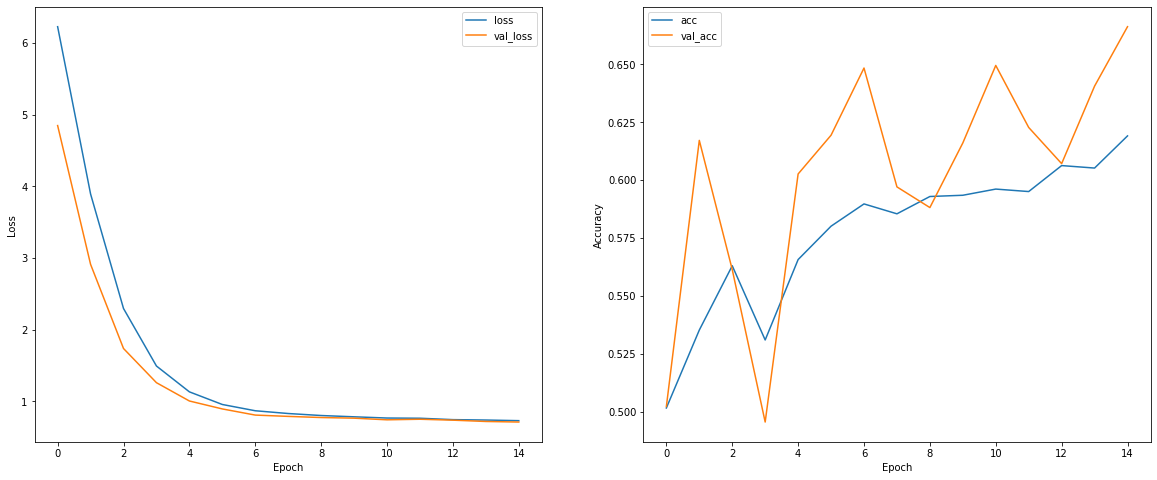

In [74]:
loss = history_l1.history['loss']
val_loss = history_l1.history['val_loss']
acc = history_l1.history['accuracy']
val_acc = history_l1.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Dropout

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [80]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_dropout = model.fit(
    train_data_gen,
    steps_per_epoch=total_train//batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val//batch_size
)

Epoch 1/15
15/15 [==============================] - 10s 647ms/step - loss: 0.7243 - accuracy: 0.5032 - val_loss: 0.6920 - val_accuracy: 0.5056
Epoch 2/15
15/15 [==============================] - 10s 638ms/step - loss: 0.6943 - accuracy: 0.5011 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/15
15/15 [==============================] - 10s 637ms/step - loss: 0.6927 - accuracy: 0.5107 - val_loss: 0.6927 - val_accuracy: 0.4978
Epoch 4/15
15/15 [==============================] - 10s 641ms/step - loss: 0.6908 - accuracy: 0.5337 - val_loss: 0.6933 - val_accuracy: 0.4955
Epoch 5/15
15/15 [==============================] - 10s 639ms/step - loss: 0.6923 - accuracy: 0.5080 - val_loss: 0.6910 - val_accuracy: 0.5078
Epoch 6/15
15/15 [==============================] - 10s 642ms/step - loss: 0.6900 - accuracy: 0.5411 - val_loss: 0.6900 - val_accuracy: 0.5056
Epoch 7/15
15/15 [==============================] - 10s 643ms/step - loss: 0.6813 - accuracy: 0.5497 - val_loss: 0.6684 - val_accuracy: 0.6295

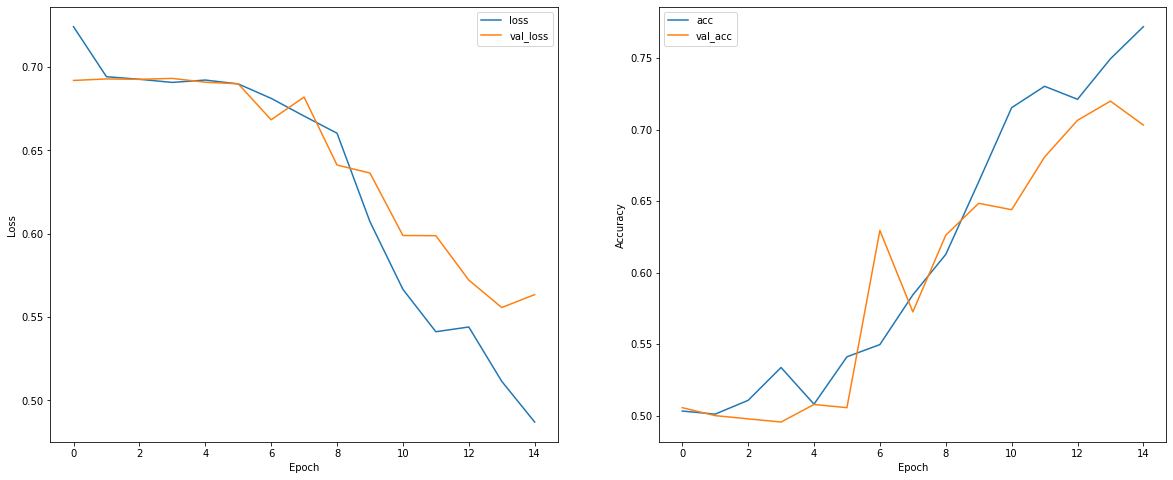

In [81]:
loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']
acc = history_dropout.history['accuracy']
val_acc = history_dropout.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Data Augumentation

In [82]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
image_gen_val = ImageDataGenerator(rescale=1./255)

In [84]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [86]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

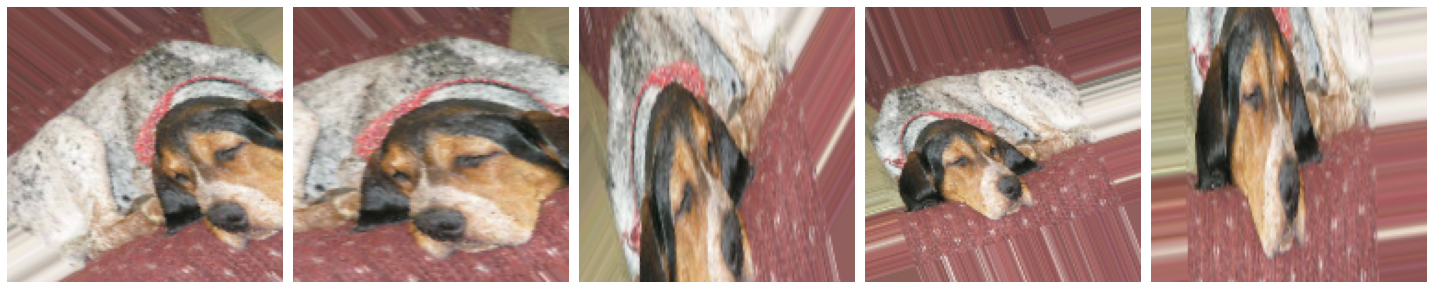

In [87]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Build the Model

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

### Train the Model

In [91]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_augumentation = model.fit(
    train_data_gen,
    steps_per_epoch=total_train//batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val//batch_size
)

Epoch 1/15
15/15 [==============================] - 19s 1s/step - loss: 0.7228 - accuracy: 0.5021 - val_loss: 0.6934 - val_accuracy: 0.4911
Epoch 2/15
15/15 [==============================] - 19s 1s/step - loss: 0.6923 - accuracy: 0.5203 - val_loss: 0.6932 - val_accuracy: 0.4944
Epoch 3/15
15/15 [==============================] - 19s 1s/step - loss: 0.6909 - accuracy: 0.5278 - val_loss: 0.6904 - val_accuracy: 0.4955
Epoch 4/15
15/15 [==============================] - 19s 1s/step - loss: 0.6853 - accuracy: 0.5502 - val_loss: 0.6497 - val_accuracy: 0.6484
Epoch 5/15
15/15 [==============================] - 19s 1s/step - loss: 0.6870 - accuracy: 0.5502 - val_loss: 0.6982 - val_accuracy: 0.4944
Epoch 6/15
15/15 [==============================] - 19s 1s/step - loss: 0.6781 - accuracy: 0.5807 - val_loss: 0.6889 - val_accuracy: 0.5223
Epoch 7/15
15/15 [==============================] - 19s 1s/step - loss: 0.6627 - accuracy: 0.5785 - val_loss: 0.6716 - val_accuracy: 0.5446
Epoch 8/15
15/15 [==

### Evalaute the Model

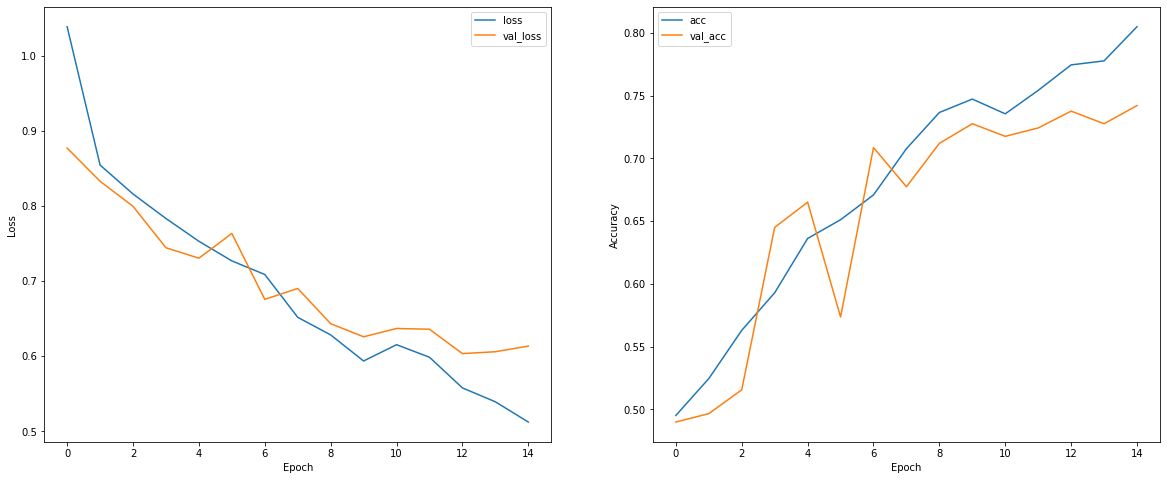

In [92]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Comparison of Methods 

In [ ]:
val_loss_original = history_original.history['val_loss']
val_loss_l1 = history_l1.history['val_loss']
val_loss_l2 = history_l2.history['val_loss']
val_loss_dropout = history_dropout.history['val_loss']
val_loss_augmentation = history_augumentation.history['val_loss']

val_acc_original = history_original.history['val_accuacy']
val_acc_l1 = history_l1.history['val_accuacy']
val_acc_l2 = history_l2.history['val_accuacy']
val_acc_dropout = history_dropout.history['val_accuacy']
val_acc_augmentation = history_augumentation.history['val_accuacy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss_original,label='Original val_loss')
plt.plot(epoch,val_loss_l1,label='L1 Regularization val_loss')
plt.plot(epoch,val_loss_l2,label='L2 Regularization val_loss')
plt.plot(epoch,val_loss_droput,label='Dropout val_loss')
plt.plot(epoch,val_loss_augmentation,label='Data Augmentation val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc_original,label='Original val_acc')
plt.plot(epoch,val_acc_l1,label='L1 Regularization val_acc')
plt.plot(epoch,val_acc_l2,label='L2 Regularization val_acc')
plt.plot(epoch,val_acc_droput,label='Dropout val_acc')
plt.plot(epoch,val_acc_augmentation,label='Data Augmentation val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Activity: Dropout and Data Augmentation


In [43]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [44]:
PATH = "/content/drive/My Drive/dataset/transport"

In [45]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [46]:
train_car_dir = os.path.join(train_dir, 'car')  # directory with our training car pictures
train_bike_dir = os.path.join(train_dir, 'bike')  # directory with our training bike pictures
train_plane_dir = os.path.join(train_dir, 'plane')  # directory with our training bike pictures
validation_car_dir = os.path.join(validation_dir, 'car')  # directory with our validation car pictures
validation_bike_dir = os.path.join(validation_dir, 'bike')  # directory with our validation bike pictures
validation_plane_dir = os.path.join(validation_dir, 'plane')  # directory with our validation bus pictures

In [47]:
num_car_tr = len(os.listdir(train_car_dir))
num_bike_tr = len(os.listdir(train_bike_dir))
num_plane_tr = len(os.listdir(train_plane_dir))

num_car_val = len(os.listdir(validation_car_dir))
num_bike_val = len(os.listdir(validation_bike_dir))
num_plane_val = len(os.listdir(validation_plane_dir))

total_train = num_car_tr + num_bike_tr + num_plane_tr
total_val = num_car_val + num_bike_val + num_plane_val

print('total training car images:', num_car_tr)
print('total training bike images:', num_bike_tr)
print('total training bus images:', num_plane_tr)

print('total validation car images:', num_car_val)
print('total validation bike images:', num_bike_val)
print('total validation plane images:', num_plane_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training car images: 20
total training bike images: 20
total training bus images: 20
total validation car images: 10
total validation bike images: 10
total validation plane images: 10
--
Total training images: 60
Total validation images: 30


In [49]:
batch_size = 10
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [50]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
image_gen_val = ImageDataGenerator(rescale=1./255)

In [68]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')

Found 60 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [69]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

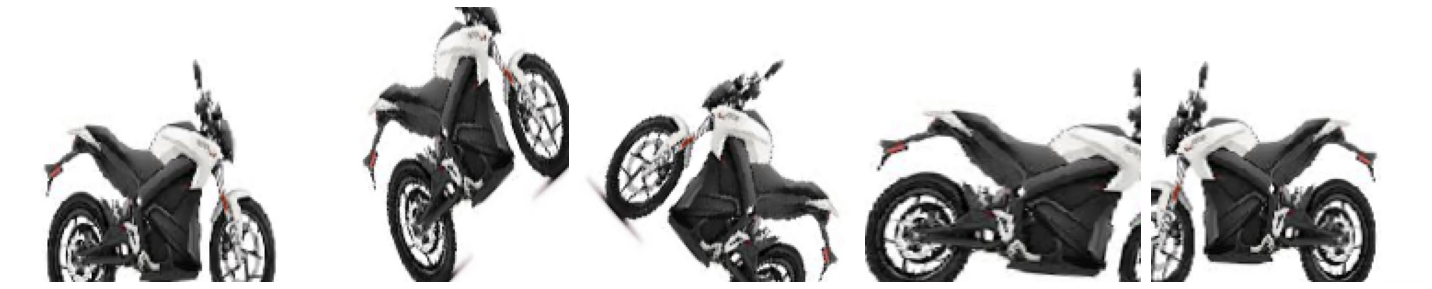

In [70]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

In [72]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history= model.fit(
    train_data_gen,
    steps_per_epoch=total_train//batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val//batch_size
)

Epoch 1/15
6/6 [==============================] - 1s 100ms/step - loss: 1.4994 - accuracy: 0.2833 - val_loss: 1.0830 - val_accuracy: 0.3333
Epoch 2/15
6/6 [==============================] - 1s 86ms/step - loss: 1.0945 - accuracy: 0.3333 - val_loss: 1.0498 - val_accuracy: 0.3333
Epoch 3/15
6/6 [==============================] - 1s 83ms/step - loss: 1.0857 - accuracy: 0.4167 - val_loss: 1.0228 - val_accuracy: 0.6333
Epoch 4/15
6/6 [==============================] - 0s 82ms/step - loss: 1.0137 - accuracy: 0.4667 - val_loss: 0.7969 - val_accuracy: 0.6000
Epoch 5/15
6/6 [==============================] - 1s 84ms/step - loss: 0.8918 - accuracy: 0.6167 - val_loss: 0.6151 - val_accuracy: 0.7333
Epoch 6/15
6/6 [==============================] - 1s 90ms/step - loss: 0.9189 - accuracy: 0.6167 - val_loss: 0.7085 - val_accuracy: 0.6667
Epoch 7/15
6/6 [==============================] - 1s 89ms/step - loss: 0.7557 - accuracy: 0.6333 - val_loss: 0.9322 - val_accuracy: 0.5000
Epoch 8/15
6/6 [==========

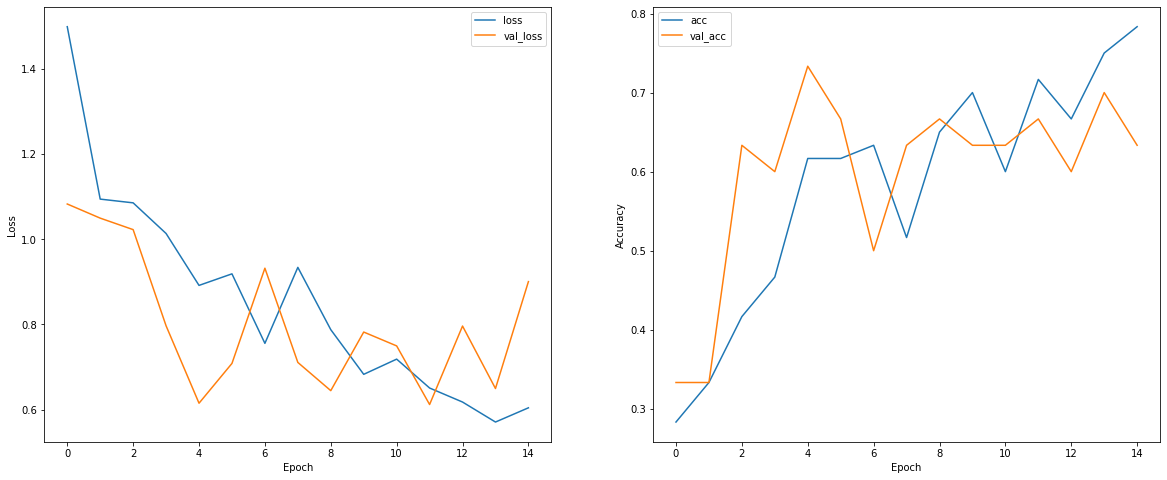

In [73]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Topic 3 Functional Keras API

## Layer as Function

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [6]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
PATH

'/root/.keras/datasets/cats_and_dogs_filtered'

In [7]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [8]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [9]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [10]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [11]:
train_image_generator = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255) 

In [12]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# model = Sequential([
#     Conv2D(32, 3, padding='same', activation='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH,3)),
#     MaxPooling2D(),
#     Conv2D(64, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
#     Conv2D(128, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
#     Conv2D(128, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dense(2, activation='softmax')
# ])

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

inputs = keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH,3))
x = Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = MaxPooling2D()(x)
x = Conv2D(64, 3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(128, 3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(128, 3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(2, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train//batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val//batch_size
)

Epoch 1/15
15/15 [==============================] - 11s 724ms/step - loss: 0.8796 - accuracy: 0.5021 - val_loss: 0.6910 - val_accuracy: 0.4955
Epoch 2/15
15/15 [==============================] - 9s 629ms/step - loss: 0.6920 - accuracy: 0.5193 - val_loss: 0.7040 - val_accuracy: 0.5112
Epoch 3/15
15/15 [==============================] - 10s 639ms/step - loss: 0.6912 - accuracy: 0.5064 - val_loss: 0.6792 - val_accuracy: 0.5737
Epoch 4/15
15/15 [==============================] - 9s 629ms/step - loss: 0.6698 - accuracy: 0.5812 - val_loss: 0.6418 - val_accuracy: 0.6417
Epoch 5/15
15/15 [==============================] - 9s 625ms/step - loss: 0.6496 - accuracy: 0.6122 - val_loss: 0.6221 - val_accuracy: 0.6562
Epoch 6/15
15/15 [==============================] - 9s 619ms/step - loss: 0.6118 - accuracy: 0.6720 - val_loss: 0.6171 - val_accuracy: 0.6373
Epoch 7/15
15/15 [==============================] - 9s 621ms/step - loss: 0.5952 - accuracy: 0.6752 - val_loss: 0.5981 - val_accuracy: 0.6819
Epoc

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Ex: Functional API

In [17]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [18]:
PATH = "/content/drive/My Drive/dataset/transport"

In [19]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [20]:
train_car_dir = os.path.join(train_dir, 'car')  # directory with our training car pictures
train_bike_dir = os.path.join(train_dir, 'bike')  # directory with our training bike pictures
train_plane_dir = os.path.join(train_dir, 'plane')  # directory with our training bike pictures
validation_car_dir = os.path.join(validation_dir, 'car')  # directory with our validation car pictures
validation_bike_dir = os.path.join(validation_dir, 'bike')  # directory with our validation bike pictures
validation_plane_dir = os.path.join(validation_dir, 'plane')  # directory with our validation bus pictures

In [21]:
batch_size = 10
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [22]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
image_gen_val = ImageDataGenerator(rescale=1./255)

In [26]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 60 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train//batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val//batch_size
)

Epoch 1/15
  6/200 [..............................] - 25s 4s/step - loss: 1.1619 - accuracy: 0.3833 - val_loss: 1.1230 - val_accuracy: 0.3333


In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

###Ensembling with Nested Models

In [28]:
from tensorflow.keras import layers

def get_model():
  inputs = keras.Input(shape=(128,))
  outputs = layers.Dense(1, activation='sigmoid')(inputs)
  return keras.Model(inputs, outputs)

model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)

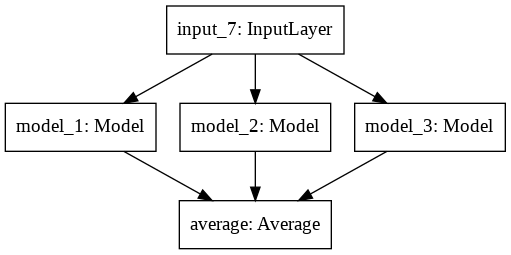

In [29]:
keras.utils.plot_model(ensemble_model, 'model.png')
# keras.utils.plot_model(model, 'model.png', show_shapes=True)


### Autoencoder

In [30]:
from tensorflow.keras import layers 
encoder_input = keras.Input(shape=(28, 28, 1), name='original_img')
x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16, 3, activation='relu')(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')
encoder.summary()

decoder_input = keras.Input(shape=(16,), name='encoded_img')
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation='relu')(x)

decoder = keras.Model(decoder_input, decoder_output, name='decoder')
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name='img')
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name='autoencoder')
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

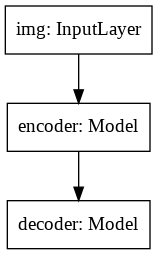

In [31]:
keras.utils.plot_model(autoencoder, 'model.png')
# keras.utils.plot_model(model, 'model.png', show_shapes=True)

### Toy Resnet

In [32]:
inputs = keras.Input(shape=(32, 32, 3), name='img')
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(64, 3, activation='relu')(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_1_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_2_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation='relu')(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs, outputs, name='toy_resnet')
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 28, 28, 64)   18496       conv2d_21[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_18 (MaxPooling2D) (None, 9, 9, 64)     0           conv2d_22[0][0]                  
_________________________________________________________________________________________

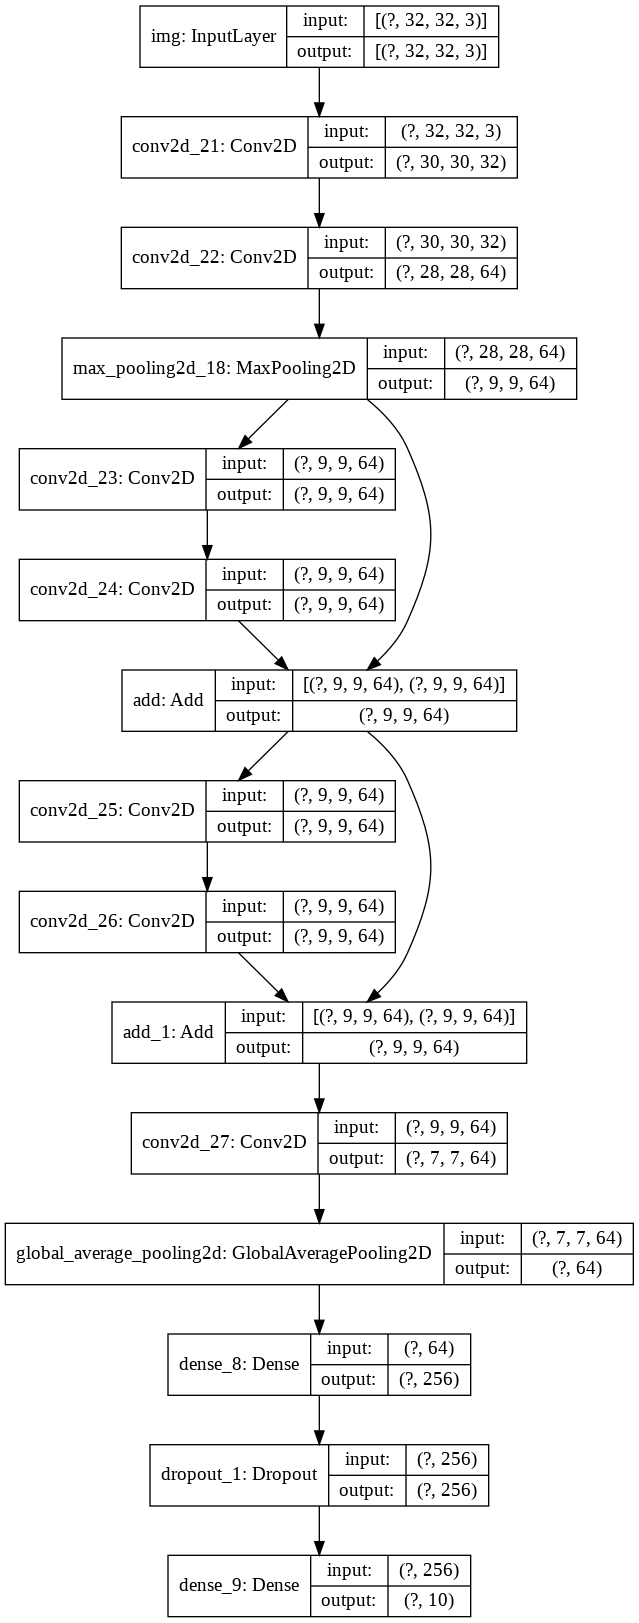

In [33]:
keras.utils.plot_model(model, 'mini_resnet.png', show_shapes=True)

### Multiple Inputs and Outputs

In [34]:
num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = keras.Input(shape=(None,), name='title')  # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name='body')  # Variable-length sequence of ints
tags_input = keras.Input(shape=(num_tags,), name='tags')  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, activation='sigmoid', name='priority')(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, activation='softmax', name='department')(x)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(inputs=[title_input, body_input, tags_input],
                    outputs=[priority_pred, department_pred])

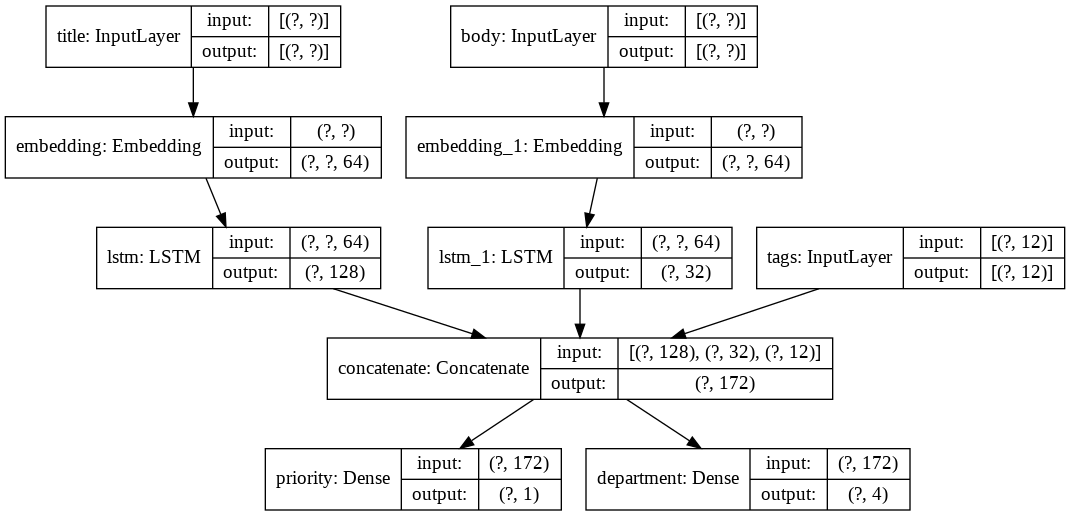

In [35]:
keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

## Ex: Funcational API

In [36]:
from tensorflow.keras import layers

inputs = keras.Input(shape=(32, 32, 3), name='img')

x = layers.Conv2D(32,(3,3), activation='relu',padding='same')(inputs)
x = layers.Conv2D(64,(3,3), activation='relu',padding='same')(x)
y1 = layers.MaxPooling2D((2,2))(x)

x = layers.Conv2D(16,(3,3), activation='relu',padding='same')(inputs)
x = layers.Conv2D(32,(3,3), activation='relu',padding='same')(x)
x = layers.Conv2D(64,(3,3), activation='relu',padding='same')(x)
y2 = layers.MaxPooling2D((2,2))(x)

y3 = layers.concatenate([y1, y2])
y4 = layers.Flatten()(y3)
y5 = layers.Dense(128,activation='softmax')(y4)
outputs = layers.Dense(10,activation='softmax')(y5)

model = keras.Model(inputs, outputs, name='dual_cnn')

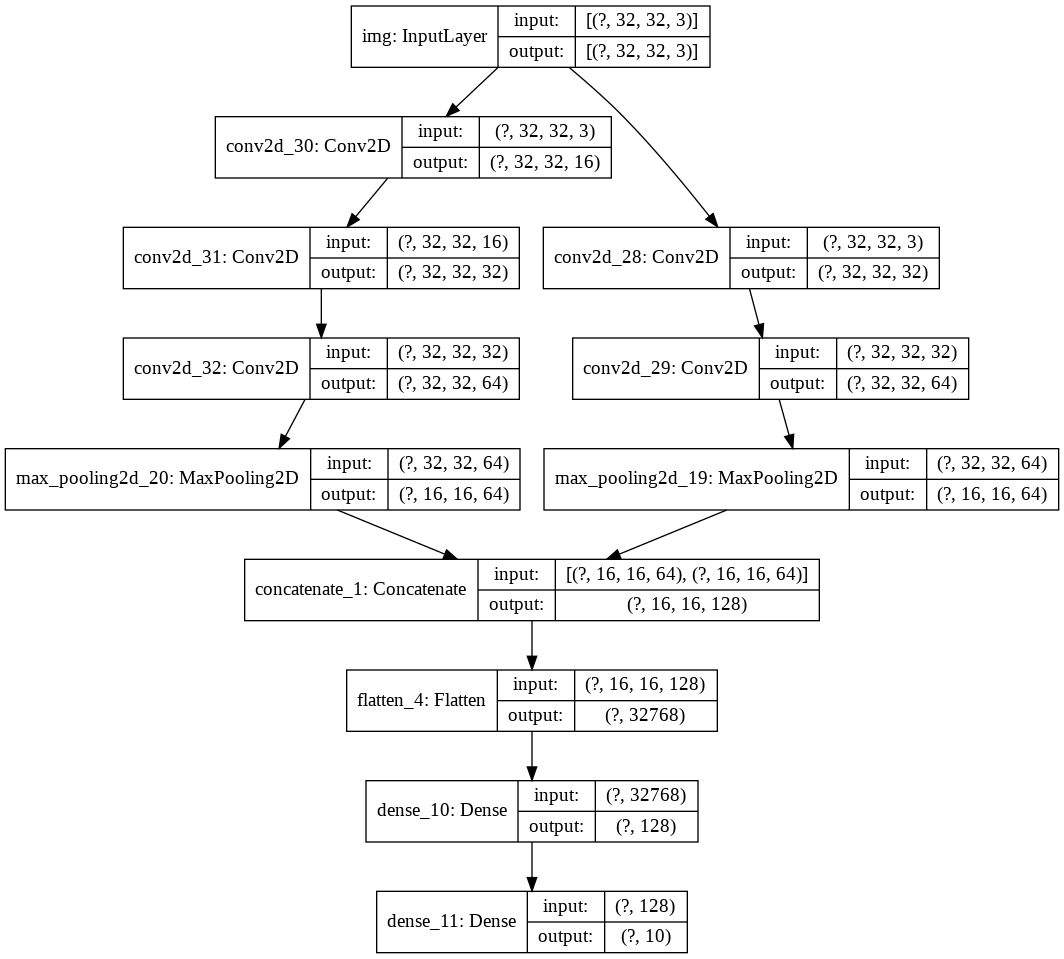

In [37]:
# keras.utils.plot_model(model, 'model.png')
keras.utils.plot_model(model, 'model.png', show_shapes=True)

# Topic 4 Transfer Learning for Small Datasets

## Feature Extraction & Fine Tuning

In [90]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow. keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [109]:
base_model=MobileNet(weights='imagenet',include_top=False, input_shape=(150, 150, 3)) 

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
x=Dense(512,activation='relu')(x) 
preds=Dense(2,activation='softmax')(x) 

model=Model(inputs=base_model.input,outputs=preds)

In [92]:
model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 151, 151, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 75, 75, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 75, 75, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 75, 75, 32)        128 

### Feature Extraction

In [93]:
# base_model.trainable = False

### Fine Tunning

In [110]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [94]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
PATH

'/root/.keras/datasets/cats_and_dogs_filtered'

In [95]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [96]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [97]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [111]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [112]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
image_gen_val = ImageDataGenerator(rescale=1./255)

In [113]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [115]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history= model.fit(
    train_data_gen,
    steps_per_epoch=total_train//batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val//batch_size
)

Epoch 1/15
15/15 [==============================] - 19s 1s/step - loss: 2.6952 - accuracy: 0.5781 - val_loss: 1.5732 - val_accuracy: 0.6864
Epoch 2/15
15/15 [==============================] - 18s 1s/step - loss: 0.4869 - accuracy: 0.8248 - val_loss: 0.2850 - val_accuracy: 0.9074
Epoch 3/15
15/15 [==============================] - 18s 1s/step - loss: 0.2318 - accuracy: 0.8932 - val_loss: 0.1056 - val_accuracy: 0.9643
Epoch 4/15
15/15 [==============================] - 18s 1s/step - loss: 0.2120 - accuracy: 0.9022 - val_loss: 0.0843 - val_accuracy: 0.9621
Epoch 5/15
15/15 [==============================] - 18s 1s/step - loss: 0.1839 - accuracy: 0.9322 - val_loss: 0.0767 - val_accuracy: 0.9676
Epoch 6/15
15/15 [==============================] - 18s 1s/step - loss: 0.1819 - accuracy: 0.9306 - val_loss: 0.0709 - val_accuracy: 0.9688
Epoch 7/15
15/15 [==============================] - 18s 1s/step - loss: 0.1544 - accuracy: 0.9359 - val_loss: 0.0789 - val_accuracy: 0.9676
Epoch 8/15
15/15 [==

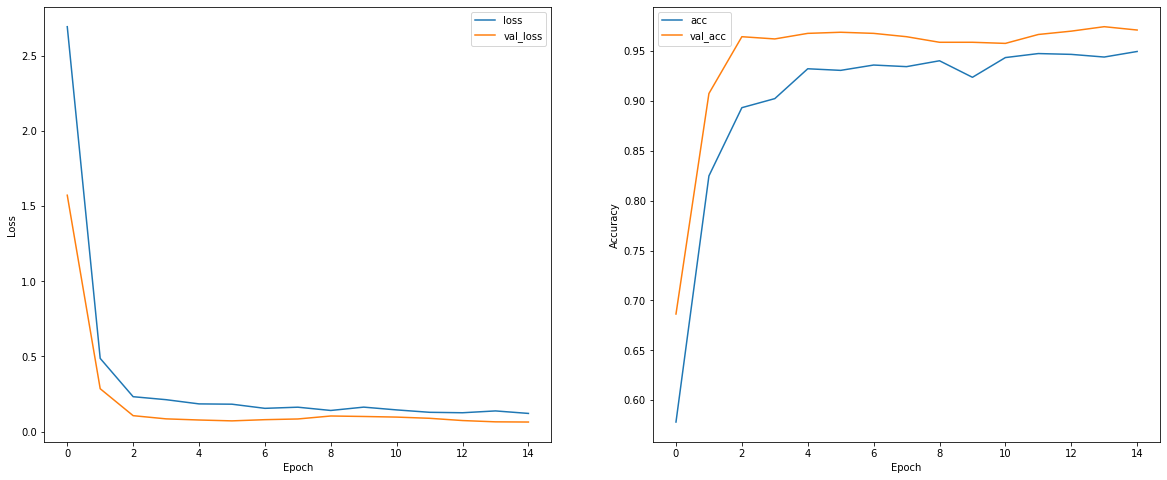

In [116]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### Testing the Model

In [103]:
from keras.preprocessing import image
import numpy as np

img_path = '/content/drive/My Drive/dataset/test_cat.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

(1, 150, 150, 3)


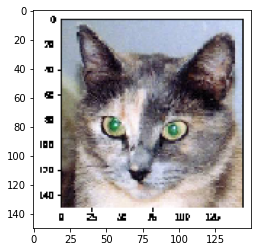

In [104]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [105]:
model.predict(img_tensor)

array([[9.9999762e-01, 2.3721427e-06]], dtype=float32)

In [106]:
img_path = '/content/drive/My Drive/dataset/test_dog.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

(1, 150, 150, 3)


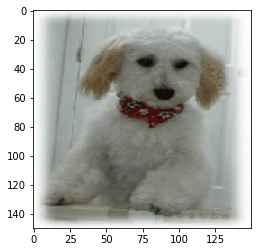

In [107]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [108]:
model.predict(img_tensor)

array([[2.7207055e-04, 9.9972790e-01]], dtype=float32)

## Ex: Transfer Learning

In [117]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [118]:
PATH = "/content/drive/My Drive/dataset/transport"

In [119]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [120]:
train_car_dir = os.path.join(train_dir, 'car')  # directory with our training car pictures
train_bike_dir = os.path.join(train_dir, 'bike')  # directory with our training bike pictures
train_plane_dir = os.path.join(train_dir, 'plane')  # directory with our training bike pictures
validation_car_dir = os.path.join(validation_dir, 'car')  # directory with our validation car pictures
validation_bike_dir = os.path.join(validation_dir, 'bike')  # directory with our validation bike pictures
validation_plane_dir = os.path.join(validation_dir, 'plane')  # directory with our validation bus pictures

In [121]:
num_car_tr = len(os.listdir(train_car_dir))
num_bike_tr = len(os.listdir(train_bike_dir))
num_plane_tr = len(os.listdir(train_plane_dir))

num_car_val = len(os.listdir(validation_car_dir))
num_bike_val = len(os.listdir(validation_bike_dir))
num_plane_val = len(os.listdir(validation_plane_dir))

total_train = num_car_tr + num_bike_tr + num_plane_tr
total_val = num_car_val + num_bike_val + num_plane_val

print('total training car images:', num_car_tr)
print('total training bike images:', num_bike_tr)
print('total training bus images:', num_plane_tr)

print('total validation car images:', num_car_val)
print('total validation bike images:', num_bike_val)
print('total validation plane images:', num_plane_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training car images: 20
total training bike images: 20
total training bus images: 20
total validation car images: 10
total validation bike images: 10
total validation plane images: 10
--
Total training images: 60
Total validation images: 30


In [129]:
batch_size = 10
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [123]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
image_gen_val = ImageDataGenerator(rescale=1./255)

In [124]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')

Found 60 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [125]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow. keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

In [126]:
base_model=MobileNet(weights='imagenet',include_top=False, input_shape=(150, 150, 3)) 

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
x=Dense(512,activation='relu')(x) 
preds=Dense(3,activation='softmax')(x) 

model=Model(inputs=base_model.input,outputs=preds)

In [127]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [131]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history= model.fit(
    train_data_gen,
    steps_per_epoch=total_train//batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val//batch_size)

Epoch 1/15
6/6 [==============================] - 2s 269ms/step - loss: 0.9751 - accuracy: 0.5167 - val_loss: 0.5816 - val_accuracy: 0.8667
Epoch 2/15
6/6 [==============================] - 1s 121ms/step - loss: 0.7836 - accuracy: 0.8333 - val_loss: 0.4059 - val_accuracy: 0.9333
Epoch 3/15
6/6 [==============================] - 1s 120ms/step - loss: 0.7656 - accuracy: 0.7167 - val_loss: 0.3164 - val_accuracy: 1.0000
Epoch 4/15
6/6 [==============================] - 1s 129ms/step - loss: 0.5988 - accuracy: 0.8167 - val_loss: 0.2553 - val_accuracy: 1.0000
Epoch 5/15
6/6 [==============================] - 1s 132ms/step - loss: 0.5416 - accuracy: 0.9000 - val_loss: 0.1957 - val_accuracy: 1.0000
Epoch 6/15
6/6 [==============================] - 1s 131ms/step - loss: 0.4706 - accuracy: 0.9333 - val_loss: 0.1666 - val_accuracy: 1.0000
Epoch 7/15
6/6 [==============================] - 1s 133ms/step - loss: 0.4235 - accuracy: 0.8833 - val_loss: 0.1267 - val_accuracy: 1.0000
Epoch 8/15
6/6 [====

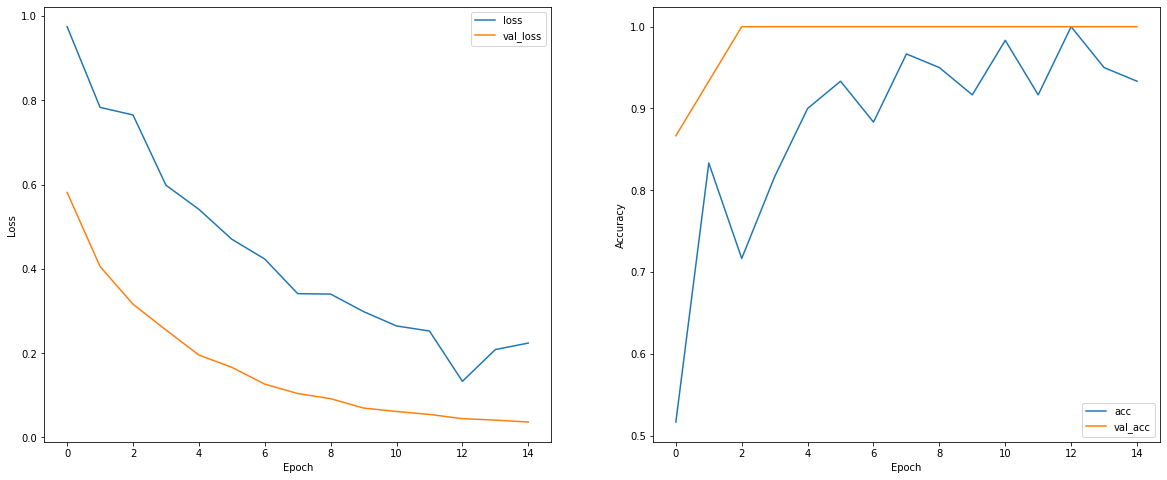

In [132]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Topic 5 Text Classification with RNN

## Text Classifcaiton With RNN

### Load the IMDB dataset

In [133]:

from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


### Build the Model

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow. keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))


### Train the Model

In [136]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(input_train, y_train, epochs=15, batch_size=128,validation_split=0.2)

Epoch 1/15
157/157 [==============================] - 15s 96ms/step - loss: 0.5123 - acc: 0.7564 - val_loss: 0.3348 - val_acc: 0.8634
Epoch 2/15
157/157 [==============================] - 15s 93ms/step - loss: 0.3030 - acc: 0.8827 - val_loss: 0.3126 - val_acc: 0.8670
Epoch 3/15
157/157 [==============================] - 14s 92ms/step - loss: 0.2374 - acc: 0.9085 - val_loss: 0.3549 - val_acc: 0.8466
Epoch 4/15
157/157 [==============================] - 15s 93ms/step - loss: 0.2048 - acc: 0.9241 - val_loss: 0.3300 - val_acc: 0.8548
Epoch 5/15
157/157 [==============================] - 14s 90ms/step - loss: 0.1778 - acc: 0.9338 - val_loss: 0.3108 - val_acc: 0.8706
Epoch 6/15
157/157 [==============================] - 14s 89ms/step - loss: 0.1575 - acc: 0.9438 - val_loss: 0.3023 - val_acc: 0.8784
Epoch 7/15
157/157 [==============================] - 14s 89ms/step - loss: 0.1458 - acc: 0.9491 - val_loss: 0.3185 - val_acc: 0.8870
Epoch 8/15
157/157 [==============================] - 14s 89ms

### Evaluate the Model

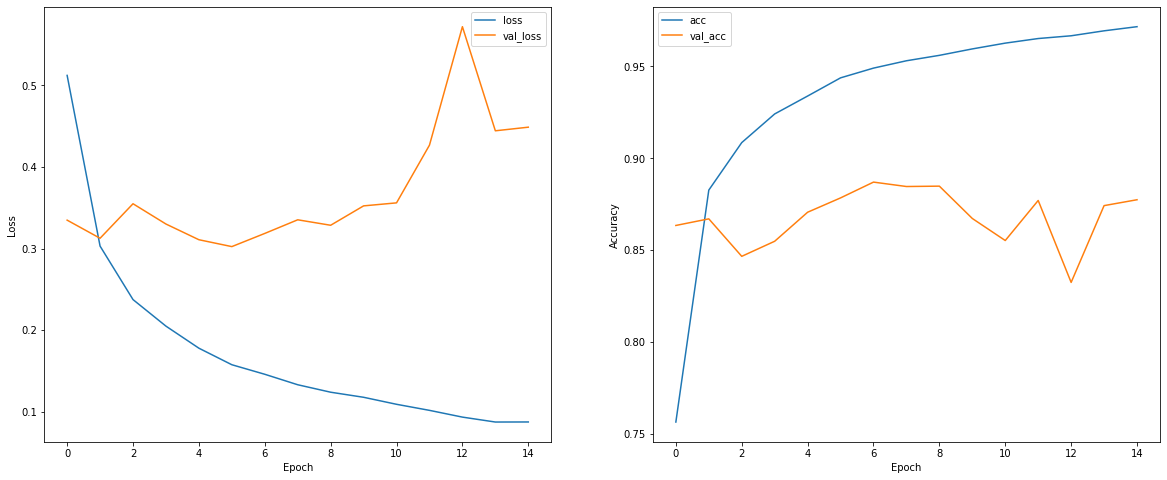

In [137]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow. keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32,dropout=0.2,recurrent_dropout=0.2,))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(input_train, y_train, epochs=15, batch_size=128,validation_split=0.2)

Epoch 1/15
157/157 [==============================] - 542s 3s/step - loss: 0.5204 - acc: 0.7478 - val_loss: 0.3655 - val_acc: 0.8552
Epoch 2/15
 39/157 [======>.......................] - ETA: 6:21 - loss: 0.3209 - acc: 0.8746

## Ex: RNN on MNIST dataset

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(32, activation='relu',input_shape=(28,28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Stack RNN Architecture

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(32, activation='relu',input_shape=(28,28),return_sequences=True),
    LSTM(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Bidirectional RNN Architecuture

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

model = Sequential([
    Bidirectional(LSTM(32, activation='relu',input_shape=(28,28))),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()